### Decision Trees and Ensemble Learning
- This is about decision trees and tree-based ensemble algorithms
- Credit risk scoring project
- Dataset: https://github.com/gastonstat/CreditScoring

### Data cleaning and preparation
- Downloading or getting the dataset
- Re-encoding categorical variables
- Doing the train/validation/test split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

url = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"
df = pd.read_csv(url)
df.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [6]:
df.shape

(4455, 14)

#### Decoding the categorical columns so it can be meanfull for reading.

- Each category starts at 1 with the first value in tuple, increments sequentially, and 0 is reserved for 'unk' (unknown).

In [7]:
# Status mapping
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

# Home mapping
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

# Marital mapping
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

# Records mapping
records_values = {
    1: 'no_rec',
    2: 'yes_rec',
    0: 'unk'
}
df.records = df.records.map(records_values)

# Job mapping
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


- The above dataframe shows we 3 column with missing values(99999999.0)

In [10]:
# Replace placeholder values (99999999) with NaN (missing values) in specific numeric columns.

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:

# Removes rows with unknown/missing target values (Can't train a model if we don't know the correct answer)
# Cleans  dataset for modeling
# Resets index so row numbers are continuous (0, 1, 2...) instead of (0, 2, 4...)

df = df[df.status != 'unk'].reset_index(drop = True)

In [13]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no_rec,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no_rec,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no_rec,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no_rec,freelance,49,140.0,0.0,0.0,550,550


In [14]:
from sklearn.model_selection import train_test_split

# First split: separate test set (20%) from full training set (80%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

# Second split: separate training set (60%) from validation set (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

# Reset indices for all splits
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no_rec,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no_rec,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no_rec,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no_rec,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no_rec,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no_rec,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no_rec,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no_rec,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no_rec,fixed,35,162.0,0.0,0.0,1800,2999


In [16]:
# Extract target variable (y) from each split
# Use 'bad' instead of 'default' as the positive class
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [17]:
# Remove target column from training dataframes
del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no_rec,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no_rec,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no_rec,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no_rec,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,priv,36,45,married,no_rec,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,priv,60,29,married,no_rec,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no_rec,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no_rec,freelance,60,100.0,18000.0,0.0,2500,2976


#### Decision trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [19]:
# A Functin representing decision tree(Manual)
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [20]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi)

'ok'

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

train_dicts  = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
# Validation set
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# Output: 0.6393 is a Poor performance
# Poor at predicting default risk on new applications

0.6699189896103267

In [23]:
# Training set
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)
# Output: 1.0 is a Perfect (overfitted)
# Model memorized all training loans/applications

1.0

- That results happned because the max depth was too deep. By reducing the depth, we are likely getting better performance.

In [24]:

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [25]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

# Below is the textual representation of a trained Decision Tree from scikit-learn using
# It prints the logic the tree learned for classification.

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



### Decision Tree Learning Algorithm

In [26]:
# Univariate data
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [27]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [28]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

from IPython.display import display
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [29]:
# T = thresholds
# printing out the decision for each threshold
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [30]:
# Multivariate data
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [31]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [32]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}
# just to understand what is going on for items() if you use a dictionary
# the dictionary is converted into a dict_items()
# from here, you are able to get the feature followed by the Ts
# e.g. feature = assets, T = [0, 2000, 3000, 4000, 5000, 8000], etc. 
print(thresholds.items())

dict_items([('assets', [0, 2000, 3000, 4000, 5000, 8000]), ('debt', [500, 1000, 2000])])


In [33]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


#### Decision Tree Learning Algorithm (Simple Explanation)

##### A decision tree learns rules by repeatedly splitting the data into smaller and purer groups.  
##### Here is the process in simple steps:


## 1. Find the Best Split
- Look at all features.
- Try different possible split points.
- Choose the split that separates the classes best.


## 2. Stop if You Hit the Maximum Depth
- If the tree has grown to the allowed depth, stop splitting.
- Mark the node as a leaf (final prediction).


## 3. Work on the Left Side
- After choosing a split, check the group of samples that go to the **left**.
- If this left group:
- Has enough samples  
- Still has mixed classes (not pure)  
- Then repeat the splitting process on this left group.


## 4. Work on the Right Side
- Do the same for the **right** group.
- If the right side has enough samples and is not pure:
 - Continue splitting it further.


## The Splitting Stops When:
- A node becomes pure (all samples are the same class), **OR**
- The node has too few samples to split, **OR**
- The maximum depth is reached.


## Final Output
- Internal nodes = decision rules (e.g., *income > 90?*)
- Leaf nodes = final predictions (e.g., *class 0 or class 1*)



### Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [34]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# We can actually tune the parameters for decision trees such that they give us a better RMSE/AUC/metric score
# Depth basically means the number of splits in the decision tree itself
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))


    # We can tell that depths 4-6 give us the best AUC score 
    # However, the best of them all is 4 which has the highest auc score.

   1 -> 0.606
   2 -> 0.669


   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.756
  10 -> 0.686
  15 -> 0.667  15 -> 0.667
  20 -> 0.659
None -> 0.661


In [36]:
# min_samples_leaf means the number of datapoints in a split needed for the next split to happen
# if there are not enough datapoints, the split won't happen at all 
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [37]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [38]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.751
5                 0.761  0.768  0.760
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

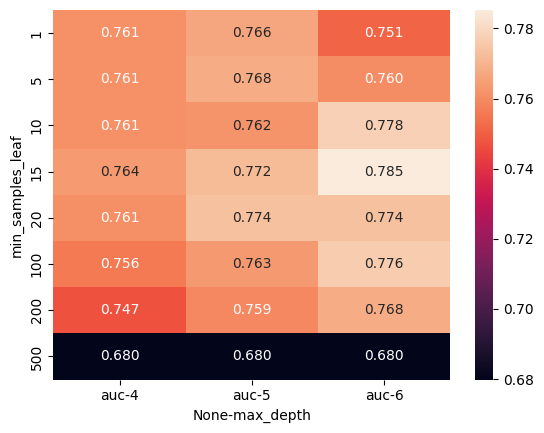

In [39]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

# Smaller depth + moderate leaf size is best
# Peak AUC is around:

# max_depth: 5 or 6
# min_samples_leaf: 15–20
# AUC ≈ 0.783

#This is very normal for credit scoring.

In [40]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Messing with the number of renditions/iterations/trees in the Random Forest Classifier itself 
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])


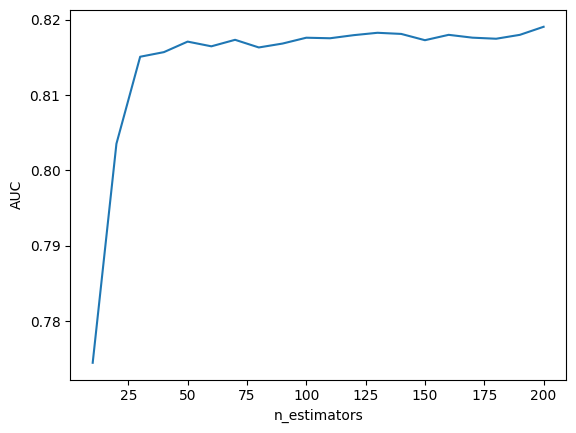

In [42]:
# Graphing

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

In [43]:
# max_depth was explained earlier.
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))


In [44]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


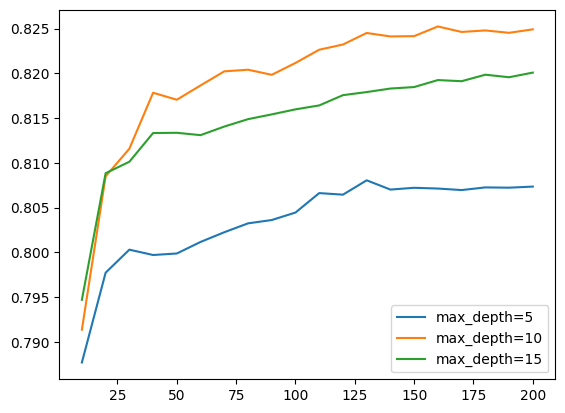

In [45]:
# Graphing 
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

# the best max-depth here is 10, the blue line curve in the graph

In [46]:
max_depth = 10

In [47]:
# min_samples_leaf has been defined earlier
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))


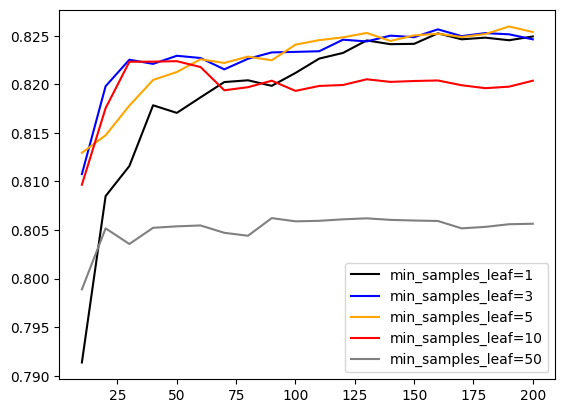

In [48]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.show()

# the best min_sample_leaf is 3, the blue line curve in the graph becauce it start to have the highest auc score than others.

In [49]:
min_samples_leaf = 3

In [50]:

# Parameters are tuned, good to go! 
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Other useful parameters:

- max_features
- Recall that a sample of n features (where n < 10) are provided to each rendition of the model.
- Max_features will then set the number of features used to train each rendition of the model in order to - - find the most optimal 'n', or number of max features.

- bootstrap
- Bootstrapping uses random wampling with replacement and is a resampling method. For more information, do - check out https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

- For documentation of a Random Forest (in this case, a classifier, but a regression is possible too):https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Gradient boosting and XGBoost¶
- Gradient boosting vs random forest
-Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output



### How does Gradient Boosting work
- We first fit the Data into the first tree, making the first set predictions. We correct the errors of the first tree and fit it into the second tree, producing another set of predictions. This repeats for n times.  Finally, we take the predictions and average the predictions, producing the final predictions.

In [ ]:
import xgboost as xgb

# The DMatrix allows for the XGBoost model to train faster as the DMatrix is optimised for the model. 
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [61]:
# We can store the parameters of the XGBoost model in a dictionary, and use that in our model 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [62]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8118506454190986

In [ ]:
# This is to setup evaluation, which is used to produce AUC 
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [67]:
# We use this to capture what is printed out when we train the XGBoost model. 
# %%capture output

In [74]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [86]:

# %%capture output did not work on vscode notebook, so we we used this below code to get same function.

import sys
from io import StringIO

# Capture stdout
old_stdout = sys.stdout
sys.stdout = captured_output = StringIO()

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

# Restore stdout
sys.stdout = old_stdout


# Create a simple object to mimic IPython's capture output
class CapturedOutput:
    def __init__(self, stdout):
        self.stdout = stdout

output = CapturedOutput(captured_output.getvalue())

In [81]:
# verbose_eval = increments of n, whereby n is what is stated. 
s = output.stdout
print(s[:200])

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	tr


In [82]:
# Function for producing a dataframe
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

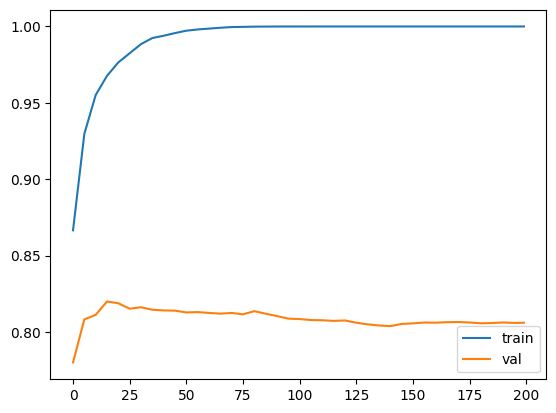

In [84]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

- From the above grapth, We can see at about iteration 25, the AUC for the validation dataset stops increasing.

- This is not the case for the training dataset, whereby the AUC stops increasing at about 60. From there onwards, it seems that we are overfitting.


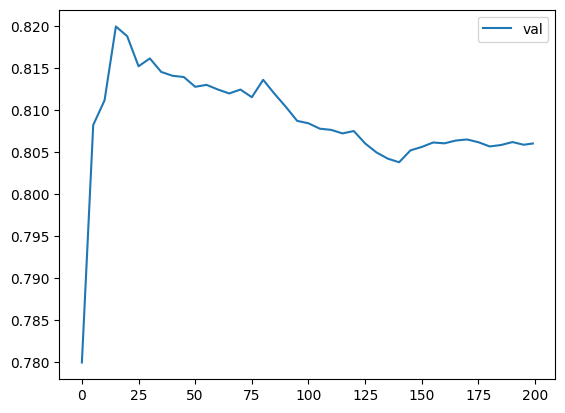

In [88]:
# Looking closer at the validation dataset
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

### XGBoost parameter tuning
#### Tuning the following parameters:
- eta
- max_depth
- min_child_weight

In [268]:
# We're starting with ETA - ETA is known as learning rate 
# We recall that we use the errors of the first model to train the second model
# We then use that to improve on the first model
# Repeat that with n times

scores = {}

In [277]:
import sys
from io import StringIO

# Create a class that writes to both stdout and captures output
class TeeOutput:
    def __init__(self, *outputs):
        self.outputs = outputs
    
    def write(self, data):
        for output in self.outputs:
            output.write(data)
    
    def flush(self):
        for output in self.outputs:
            output.flush()

# Capture stdout while still displaying it
old_stdout = sys.stdout
captured_output = StringIO()
sys.stdout = TeeOutput(old_stdout, captured_output)

# 'eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

# Restore stdout
sys.stdout = old_stdout

# Create a simple object to mimic IPython's capture output
class CapturedOutput:
    def __init__(self, stdout):
        self.stdout = stdout

output = CapturedOutput(captured_output.getvalue())

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.96126	val-auc:0.78834
[10]	train-auc:0.98555	val-auc:0.78862
[15]	train-auc:0.99523	val-auc:0.78400
[20]	train-auc:0.99943	val-auc:0.78606
[25]	train-auc:0.99997	val-auc:0.79065
[30]	train-auc:1.00000	val-auc:0.78718
[35]	train-auc:1.00000	val-auc:0.78548
[40]	train-auc:1.00000	val-auc:0.78776
[45]	train-auc:1.00000	val-auc:0.78904
[50]	train-auc:1.00000	val-auc:0.78900
[55]	train-auc:1.00000	val-auc:0.79142
[60]	train-auc:1.00000	val-auc:0.79151
[65]	train-auc:1.00000	val-auc:0.79122
[70]	train-auc:1.00000	val-auc:0.79217
[75]	train-auc:1.00000	val-auc:0.79235
[80]	train-auc:1.00000	val-auc:0.79172
[85]	train-auc:1.00000	val-auc:0.79271
[90]	train-auc:1.00000	val-auc:0.79230
[95]	train-auc:1.00000	val-auc:0.79243
[100]	train-auc:1.00000	val-auc:0.79292
[105]	train-auc:1.00000	val-auc:0.79315
[110]	train-auc:1.00000	val-auc:0.79424
[115]	train-auc:1.00000	val-auc:0.79466
[120]	train-auc:1.00000	val-auc:0.79409
[125]	train-auc:1.0000

In [265]:
scores = {}

In [278]:
# Note that you have to manually change the eta and run this cell to capture all the outputs 
# However, for Kaggle, I have decided to save this as a quick output instead so that you can see the results
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [214]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.96126,0.78834
2,10,0.98555,0.78862
3,15,0.99523,0.78400
4,20,0.99943,0.78606
5,25,0.99997,0.79065
6,30,1.00000,0.78718
7,35,1.00000,0.78548
8,40,1.00000,0.78776
9,45,1.00000,0.78904


In [279]:
scores.keys()

# below is the outpout to the xgbost parametre cell and scores.key that was ran 5 times

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

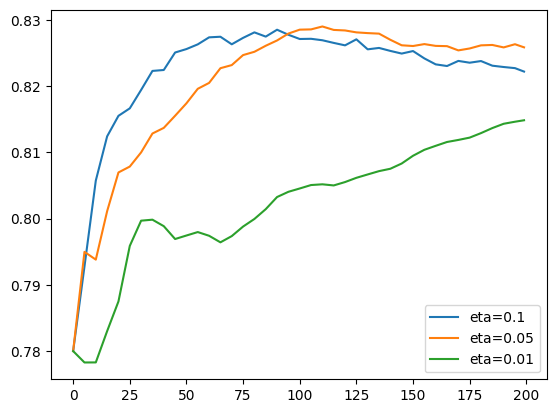

In [282]:
etas = ['eta=0.1','eta=0.05', 'eta=0.01' ]

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()
plt.show()